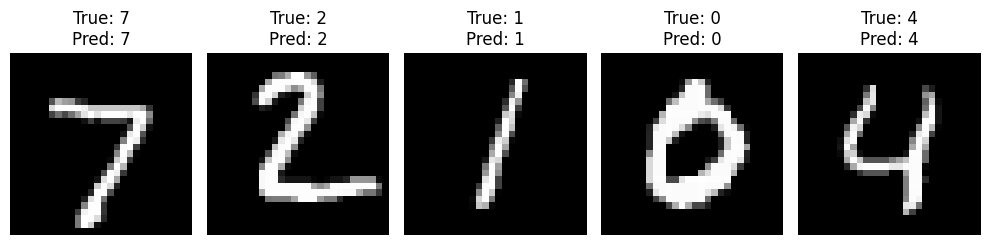

In [10]:
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {y_pred[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [11]:
y_pred = np.argmax(model.predict(X_test), axis=1)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


313/313 [==============================] - 2s 7ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.95      1.00      0.97      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")


313/313 [==============================] - 3s 9ms/step - loss: 0.0402 - accuracy: 0.9869

Test Accuracy: 98.69%


In [13]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0130 - accuracy: 0.9958 - val_loss: 0.0367 - val_accuracy: 0.9890
Epoch 2/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0123 - accuracy: 0.9958 - val_loss: 0.0330 - val_accuracy: 0.9906
Epoch 3/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0088 - accuracy: 0.9970 - val_loss: 0.0377 - val_accuracy: 0.9891
Epoch 4/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0076 - accuracy: 0.9973 - val_loss: 0.0309 - val_accuracy: 0.9907
Epoch 5/5
1875/1875 [==============================] - 78s 41ms/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.0357 - val_accuracy: 0.9916


In [14]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [15]:
# Load dataset
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Add channel dimension (needed for CNN)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Confirm shapes
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (60000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report
